hi
Optimization terminated successfully.
         Current function value: 0.491607
         Iterations 6

 Feature Selection
             CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
RestingBP        1.002534       1.018431    1.010451    0.01
Age              1.012552       1.045532    1.028910    0.00
Cholesterol      0.994566       0.997862    0.996213    0.00
MaxHR            0.973579       0.984346    0.978947    0.00
Oldpeak          2.158750       3.137526    2.602525    0.00
FastingBS        2.136845       4.978849    3.261753    0.00
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      912
Method:                           MLE   Df Model:                            5
Date:                Mon, 08 Nov 2021   Pseudo R-squ.:                  0.2849
Time:                        23:41:13   Log-Likelihoo

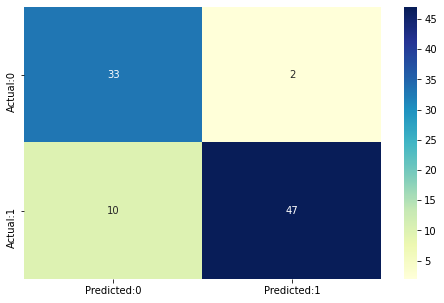

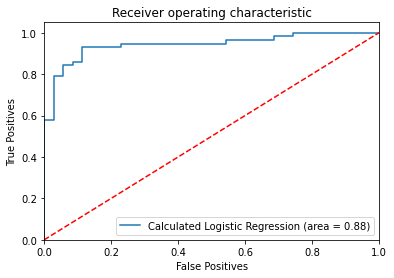


 **** Thank You ****


In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn

print ("Hi, This is the Jupyter Notebook file")

heart_data = pd.read_csv ( 'C:\\Users\\allwy\\OneDrive\\Desktop\\Big_Data_Project_Report\\heart.csv' )

cols = ['RestingBP' , 'Age' , 'Cholesterol' , 'MaxHR' , 'Oldpeak' , 'FastingBS']
X = heart_data[cols]
y = heart_data['HeartDisease']
import statsmodels.api as sm

# print(X)
# print(y)
logit_model = sm.Logit ( y , X )
result = logit_model.fit ( )
print ( "\n Feature Selection" )
print ( "==============================================================================" )
params = np.exp ( result.params )
conf = np.exp ( result.conf_int ( ) )
conf['OR'] = params
pvalue = round ( result.pvalues , 2 )
conf['pvalue'] = pvalue
conf.columns = ['CI 95%(2.5%)' , 'CI 95%(97.5%)' , 'Odds Ratio' , 'pvalue']
print ( (conf) )
print ( "==============================================================================" )
print ( result.summary ( ) )

print ( "Features and target label determination" )
from sklearn.linear_model import LogisticRegression

X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size=0.1, random_state=3)
logreg = LogisticRegression ( )
logreg.fit ( X_train , y_train )
y_pred = logreg.predict ( X_test )
print ( '\nAccuracy of logistic regression classifier on test Data set is : {:.2f}'.format (
    logreg.score ( X_test , y_test ) * 100 ) , "%" )
from sklearn import metrics
print("Precision of logistic regression classifier on test Data set is :",round((metrics.precision_score(y_test, y_pred))*100) , "%" )
print("Recall of logistic regression classifier on test Data set is :",round((metrics.recall_score(y_test, y_pred))*100) , "%" )

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix ( y_test , y_pred )
conf_matrix = pd.DataFrame ( data=confusion_matrix , columns=['Predicted:0' , 'Predicted:1'] ,
                             index=['Actual:0' , 'Actual:1'] )
plt.figure ( figsize=(8 , 5) )
sns.heatmap ( conf_matrix , annot=True , fmt='d' , cmap="YlGnBu" )
print ( "\nConfusion Matrix:" )
print ( confusion_matrix )

from sklearn.metrics import classification_report

print ( "\n Classification Report:" )
print ( classification_report ( y_test , y_pred ) )

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score ( y_test , logreg.predict ( X_test ) )
fpr , tpr , thresholds = roc_curve ( y_test , logreg.predict_proba ( X_test )[: , 1] )
plt.figure ( )
plt.plot ( fpr , tpr , label='Calculated Logistic Regression (area = %0.2f)' % logit_roc_auc )
plt.plot ( [0 , 1] , [0 , 1] , 'r--' )
plt.xlim ( [0.0 , 1.0] )
plt.ylim ( [0.0 , 1.05] )
plt.xlabel ( 'False Positives' )
plt.ylabel ( 'True Positives' )
plt.title ( 'Receiver operating characteristic' )
plt.legend ( loc="lower right" )
plt.savefig ( 'Log_ROC' )
plt.show ( )

print ( "\n **** Thank You ****" )


In [8]:
# 